### Assignment - A4 -| Name : Anupkumar Singh | Roll No :49 | Division : B

Create a Linear Regression Model using Python/R to predict home prices
using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing
(https://www.kaggle.com/c/boston-housing)). The Boston Housing dataset
contains information about various houses in Boston through different
parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given
features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Boston = pd.read_csv("D:\CLG_PHOTOS\dsbda prac\Boston.csv")
Boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
Boston.info()
Boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  BLACK       506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

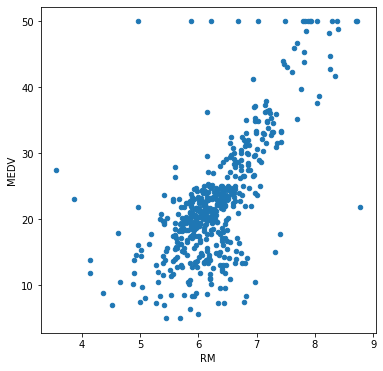

In [4]:
Boston.plot.scatter('RM', 'MEDV', figsize=(6, 6))

<AxesSubplot:>

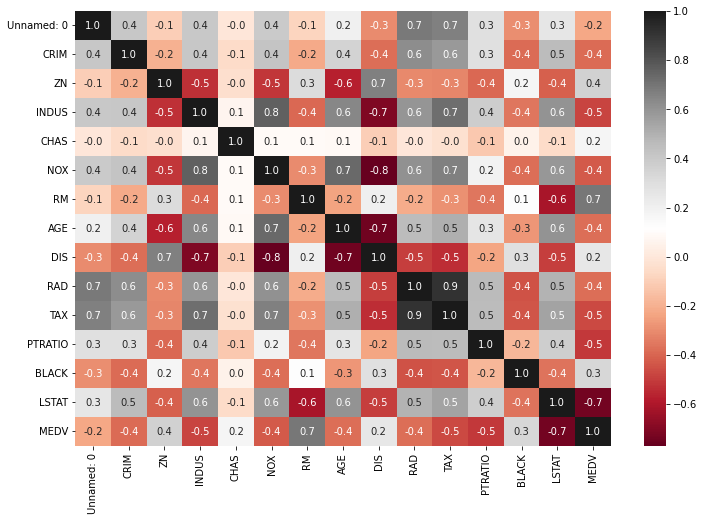

In [5]:
plt.subplots(figsize=(12,8))
sns.heatmap(Boston.corr(), cmap = 'RdGy', annot = True, fmt = '.1f')

In [10]:
X = Boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO','BLACK','LSTAT']]
Y = Boston['MEDV']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
# Split DataSet
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

In [13]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')


Train Dataset Size - X: (354, 13), Y: (354,)
Test Dataset Size - X: (152, 13), Y: (152,)


In [14]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Test vs Prediction')

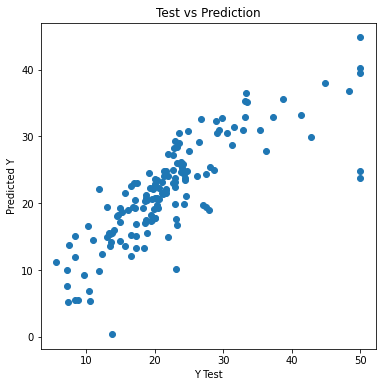

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')

Text(0.5, 1.0, 'Regression Line Tracing')

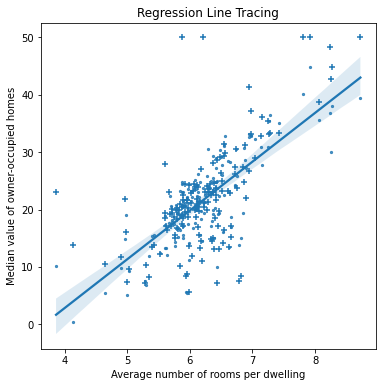

In [16]:
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test['RM'], Y_test, marker = '+')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes')
plt.title('Regression Line Tracing')


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 3.6099040603818158
Mean Square Error: 27.19596576688333
Root Mean Square Error: 5.214975145375415


In [19]:
coefficients = pd.DataFrame(lm.coef_.round(2), X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.12
ZN,0.04
INDUS,0.01
CHAS,2.51
NOX,-16.23
RM,3.86
AGE,-0.01
DIS,-1.50
RAD,0.24
TAX,-0.01
